Demo showing that the mature and immature dendritic cells can be distinguished using the eigenvalues of the graph Laplacian.

In [2]:
# imports
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import graphlearning as gl

In [3]:
immat = Image.open(r"C:\Users\Kyler\Desktop\UROP\Data\Cell Data\Immature_DC\immature-cell-1\immature-edges.tif") # plt.imread, plt.imsave
immat_array = np.array(immat)
immat_edges = immat_array.nonzero()

mat = Image.open(r"C:\Users\Kyler\Desktop\UROP\Data\Cell Data\Mature_DC\mature-cell-1\mature-edges.tif") # plt.imread, plt.imsave
mat_array = np.array(mat)
mat_edges = mat_array.nonzero()

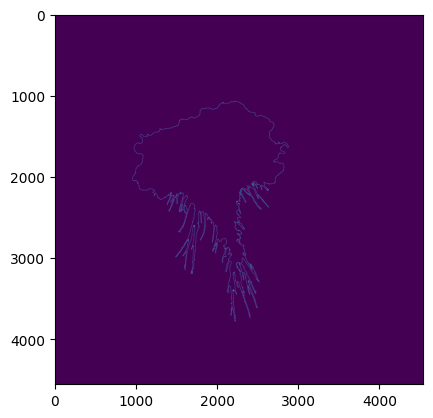

In [4]:
plt.imshow(immat)

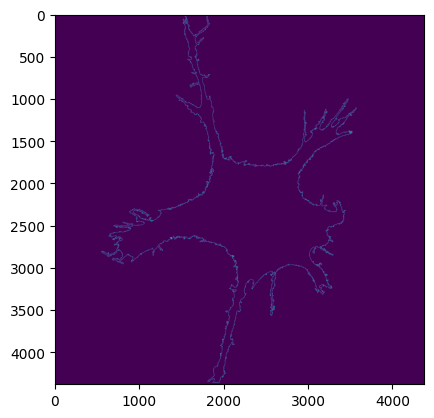

In [5]:
plt.imshow(mat)

In [6]:
u = []
for i in range(immat_edges[0].shape[0]):
    x_normal = immat_edges[0][i] / immat_array.shape[0]
    y_normal = immat_edges[1][i] / immat_array.shape[1]
    u.append((x_normal, y_normal))

n = 5000 # number of points
eps = 0.05 # connectivity
X = random.sample(u, n)
W = gl.weightmatrix.epsilon_ball(np.array(X), eps)
G = gl.graph(W)

#Eigenvectors of graph Laplacian (we can change the normalization later)
vals_immat, vecs_immat = G.eigen_decomp(k=50,normalization='normalized')

In [18]:
v = []
for i in range(mat_edges[0].shape[0]):
    x_normal = mat_edges[0][i] / mat_array.shape[0]
    y_normal = mat_edges[1][i] / mat_array.shape[1]
    v.append((x_normal, y_normal))

n = 5000 # number of points
eps = 0.05 # connectivity
X = random.sample(v, n)
W = gl.weightmatrix.epsilon_ball(np.array(X), eps)
G = gl.graph(W)

#Eigenvectors of graph Laplacian (we can change the normalization later)
vals_mat, vecs_mat = G.eigen_decomp(k=50,normalization='normalized')

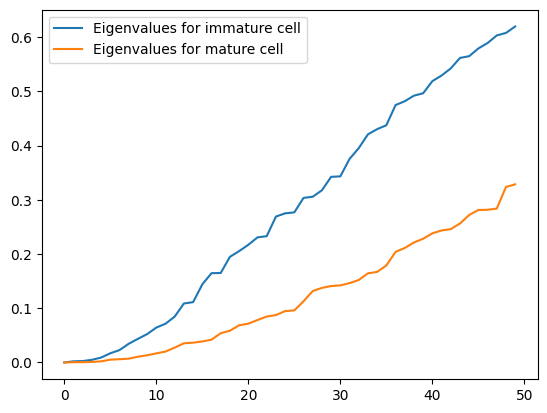

In [19]:
#Plot eigenvalues
plt.plot(vals_immat,label='Eigenvalues for immature cell')
plt.plot(vals_mat,label='Eigenvalues for mature cell')
plt.legend()
plt.savefig('dendritic_eigenvalues.png')
plt.show()

#Multiplcation by the transpose of the matrix vecs_disk or vecs_square is the graph Fourier transform